In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import datasets
     
    from collections import Counter

In [2]:
    iris = datasets.load_iris()
    df = pd.DataFrame(
        iris.data,
        columns = iris.feature_names
    )
    df["label"] = iris.target
     
    df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
    df = df.sample(frac=1).reset_index(drop=True)
    df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,4.7,3.2,1.6,0.2,0
1,6.0,2.7,5.1,1.6,1
2,5.2,3.5,1.5,0.2,0
3,5.7,2.9,4.2,1.3,1
4,7.2,3.0,5.8,1.6,2


In [4]:
    train_size = 75
    train_data = df.iloc[:train_size].values
    test_data = df.iloc[train_size:].values

In [5]:
    def knn(k, train_data, test_data):
        labels = []
        
        for test in test_data:
            
            # 1. すべてのトレインデータとtest（このループステップでラベルを予測したいデータ）との距離を計算したリストを作る
            distances = np.sum((train_data[:,:-1]-test[:-1])**2, axis=1)
            
            # 2. 距離リストの値が小さい順に並べた、トレインデータのインデックスを持つリストを作る
            sorted_train_indexes = np.argsort(distances)
            
            # 3. インデックスリストを元に、testから近いk個のトレインデータのラベルを取り出す
            sorted_k_labels = train_data[sorted_train_indexes, -1][:k]
            
            # 4. sorted_k_labelsの中で最も数の多かったlabelを取り出す
            label = Counter(sorted_k_labels).most_common(1)[0][0]
            labels.append(label)
        return labels

In [6]:
pred_labels = knn(2, train_data, test_data)

In [7]:
    np.sum(pred_labels == test_data[:,-1]) / len(test_data)
     
    # 出力結果
    0.9733333333333334

0.9733333333333334

Text(0.5,1,'true label')

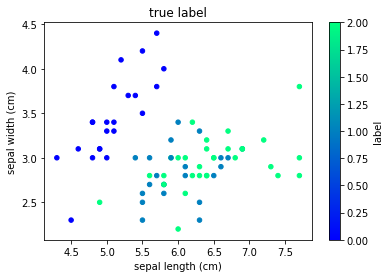

In [8]:
    test_df = df.iloc[train_size:].copy()
    test_df["pred_label"] = pred_labels
     
    test_df.plot(kind="scatter", x=0,y=1,c="label", cmap="winter")
    plt.title("true label")